In [268]:
import pandas as pd


In [269]:
df = pd.read_csv('loan.csv',low_memory=False)

In [270]:
df.shape

(39717, 111)

Null value analysis


In [271]:
df = df.loc[:,df.isnull().sum() != len(df)]

In [272]:
df.shape

(39717, 57)

In [273]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [274]:
df = df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)

In [275]:
df.shape

(39717, 53)

In [276]:
df.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [277]:
df.tax_liens.value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

In [278]:
df.tax_liens =  df.tax_liens.fillna(0.0)

In [279]:
df.tax_liens.value_counts()

tax_liens
0.0    39717
Name: count, dtype: int64

In [280]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

In [281]:
df.chargeoff_within_12_mths = df.chargeoff_within_12_mths.fillna(0.0)

In [282]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39717
Name: count, dtype: int64

In [283]:
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [284]:
df.collections_12_mths_ex_med = df.collections_12_mths_ex_med.fillna(0.0)

In [285]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39717
Name: count, dtype: int64

In [286]:
df.last_pymnt_d

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [287]:
df.revol_util.value_counts().sort_values()

revol_util
37.63%      1
33.29%      1
58.19%      1
5.34%       1
6.75%       1
         ... 
0.10%      58
40.70%     58
63%        62
0.20%      63
0%        977
Name: count, Length: 1089, dtype: int64

In [288]:
df = df[~df.revol_util.isna()]

In [289]:
df.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2455
emp_length                    1072
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

# Nulls are removed, now will clean the data

In [290]:
df.columns    

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [291]:
df.columns = df.columns.str.strip()

In [292]:
for c in df.columns:
    if(len(df[c].value_counts()) > 1):
       print(len(df[c].value_counts()))

39667
39667
884
1040
8195
2
371
15363
7
35
28781
11
5
5313
3
55
3
39667
14
19583
823
50
2868
11
526
9
40
5
21711
1089
82
1137
1138
37800
37470
7963
35105
1353
4026
2610
101
34901
106
3


In [293]:
for c in df.columns:
    if(len(df[c].value_counts()) <= 1):
       df.drop(c,axis=1,inplace=True)

In [294]:
df.shape

(39667, 44)

we can drop any column that may not be needed for analysis

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39667 non-null  int64  
 1   member_id                39667 non-null  int64  
 2   loan_amnt                39667 non-null  int64  
 3   funded_amnt              39667 non-null  int64  
 4   funded_amnt_inv          39667 non-null  float64
 5   term                     39667 non-null  object 
 6   int_rate                 39667 non-null  object 
 7   installment              39667 non-null  float64
 8   grade                    39667 non-null  object 
 9   sub_grade                39667 non-null  object 
 10  emp_title                37212 non-null  object 
 11  emp_length               38595 non-null  object 
 12  home_ownership           39667 non-null  object 
 13  annual_inc               39667 non-null  float64
 14  verification_status      39

In [296]:
df.last_credit_pull_d.value_counts()

last_credit_pull_d
May-16    10302
Apr-16     2546
Mar-16     1121
Feb-13      842
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64

In [297]:
df = df.drop(['id','member_id','url','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','issue_d','funded_amnt','funded_amnt_inv'],axis=1)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39667 non-null  int64  
 1   term                  39667 non-null  object 
 2   int_rate              39667 non-null  object 
 3   installment           39667 non-null  float64
 4   grade                 39667 non-null  object 
 5   sub_grade             39667 non-null  object 
 6   emp_title             37212 non-null  object 
 7   emp_length            38595 non-null  object 
 8   home_ownership        39667 non-null  object 
 9   annual_inc            39667 non-null  float64
 10  verification_status   39667 non-null  object 
 11  loan_status           39667 non-null  object 
 12  purpose               39667 non-null  object 
 13  title                 39656 non-null  object 
 14  zip_code              39667 non-null  object 
 15  addr_state            39

## change data types whereever necessary

 int_rate , earliest_cr_line, revol_util should be checked if they can be changed to int,float,  date time

In [299]:
df.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
17.34%      1
16.71%      1
16.15%      1
18.36%      1
14.67%      1
Name: count, Length: 371, dtype: int64

In [300]:
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%','')))

In [301]:
df.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
0.75%       1
2.64%       1
81.31%      1
26.33%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [302]:
df.revol_util = df.revol_util.apply(lambda x: float(x.replace('%','')))

In [303]:
df.earliest_cr_line

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39667, dtype: object

In [304]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format='%b-%y')

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39667 non-null  int64         
 1   term                  39667 non-null  object        
 2   int_rate              39667 non-null  float64       
 3   installment           39667 non-null  float64       
 4   grade                 39667 non-null  object        
 5   sub_grade             39667 non-null  object        
 6   emp_title             37212 non-null  object        
 7   emp_length            38595 non-null  object        
 8   home_ownership        39667 non-null  object        
 9   annual_inc            39667 non-null  float64       
 10  verification_status   39667 non-null  object        
 11  loan_status           39667 non-null  object        
 12  purpose               39667 non-null  object        
 13  title                

In [306]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,17.94,0,1996-01-01,0,15,0,27783,53.9,38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,...,11.33,0,1990-11-01,0,13,0,7274,13.1,40,NaN
39713,8500,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,...,6.40,1,1986-12-01,1,6,0,8847,26.9,9,NaN
39714,5000,36 months,8.07,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,...,2.30,0,1998-10-01,0,11,0,9698,19.4,20,NaN
39715,5000,36 months,7.43,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,...,3.72,0,1988-11-01,0,17,0,85607,0.7,26,NaN


###  lets start analysis

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

## Consumer Attributes and loan attributes


In [308]:
ca = ['emp_title','emp_length','home_ownership','verification_status','purpose','title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','pub_rec_bankruptcies']
la = ['loan_amnt','term','int_rate','installment','grade','sub_grade']

### lets filter out defaulters and fully paid from this

<b>loan attribute </b>

In [309]:
df_def = df[df['loan_status'] == 'Charged Off']
df_fp = df[df['loan_status'] == 'Fully Paid']

<Axes: xlabel='grade'>

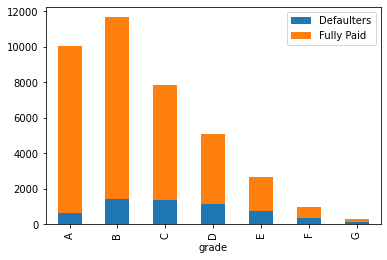

In [310]:
df_def1 = df_def.grade.value_counts().sort_index()
df_fp1 = df_fp.grade.value_counts().sort_index()
df_grade = pd.DataFrame({'Defaulters':df_def1.values,'Fully Paid':df_fp1.values},df_def1.index)
df_grade.plot(kind='bar',stacked=True)

<Axes: xlabel='sub_grade'>

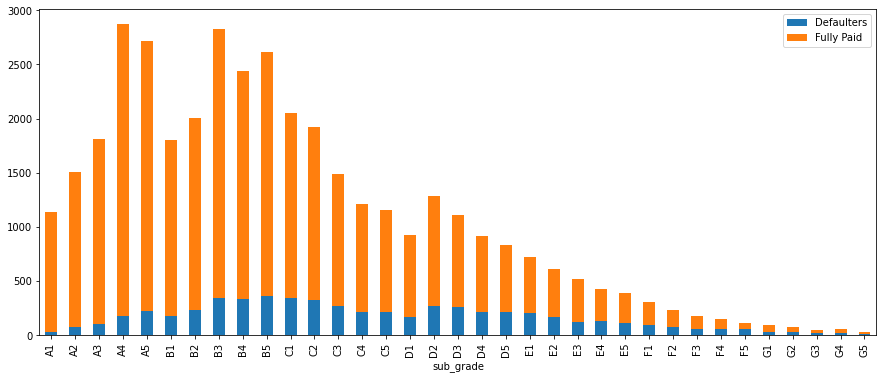

In [311]:
df_def1 = df_def.sub_grade.value_counts().sort_index()
df_fp1 = df_fp.sub_grade.value_counts().sort_index()
df_grade = pd.DataFrame({'Defaulters':df_def1.values,'Fully Paid':df_fp1.values},df_def1.index)
df_grade.plot(kind='bar',stacked=True,figsize=(15,6))

<Axes: xlabel='loan_status', ylabel='installment'>

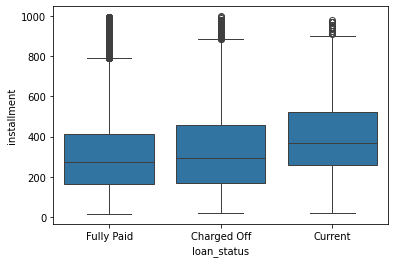

In [312]:
# grade box plot
sns.boxplot(y=df[df.installment < 1000].installment,x=df.loan_status)

<Axes: xlabel='loan_status', ylabel='int_rate'>

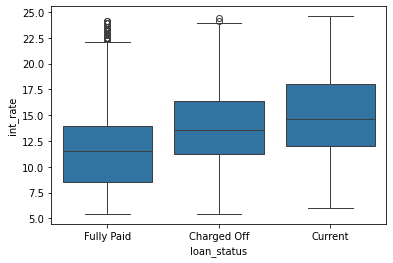

In [313]:
sns.boxplot(y=df.int_rate,x=df.loan_status)

In [314]:
df.int_rate.describe()

count    39667.000000
mean        12.016587
std          3.723856
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

In [315]:
df['ir_cat'] = pd.cut(df.int_rate,bins=[5.00,9.25,14.54,25],labels=['low','medium','high'])
df_def = df[df['loan_status'] == 'Charged Off']
df_fp = df[df['loan_status'] == 'Fully Paid']

<Axes: xlabel='ir_cat'>

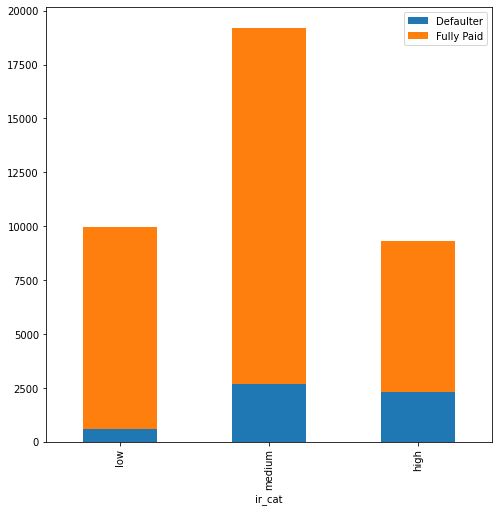

In [316]:
pd.DataFrame({'Defaulter':df_def.ir_cat.value_counts().sort_index().values,'Fully Paid':df_fp.ir_cat.value_counts().sort_index().values},df_fp.ir_cat.value_counts().sort_index().index).plot(kind='bar',stacked=True,figsize=(8,8))

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

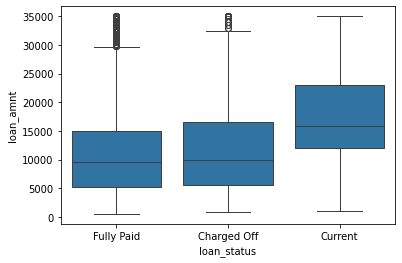

In [317]:
sns.boxplot(y=df.loan_amnt,x=df.loan_status)

<Axes: xlabel='term'>

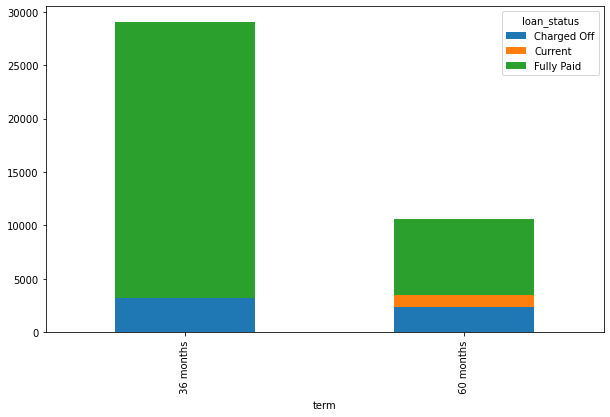

In [318]:
df1 = df.groupby(['term','loan_status']).count().reset_index()
pd.pivot_table(df1,values='int_rate',index='term',columns='loan_status',aggfunc='max',fill_value=0).plot(kind='bar',stacked=True,figsize=(10,6))

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

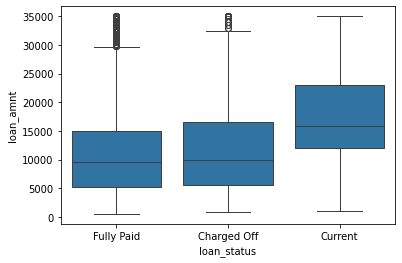

In [319]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)


ca = ['emp_title','emp_length','home_ownership','verification_status','purpose','title','zip_code', <bR>
'addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths',<br>
'open_acc','pub_rec','revol_bal','revol_util','total_acc','pub_rec_bankruptcies']


In [320]:
df.emp_length = df.emp_length.str.rstrip(' year').str.rstrip(' years').str.replace('10+','15').replace('< 1','0.5').str.strip(' ').fillna('0').astype('float')


In [321]:
df.emp_length.value_counts()

emp_length
15.0    8878
0.5     4571
2.0     4383
3.0     4091
4.0     3429
5.0     3278
1.0     3234
6.0     2226
7.0     1770
8.0     1477
9.0     1258
0.0     1072
Name: count, dtype: int64

<Axes: xlabel='emp_length'>

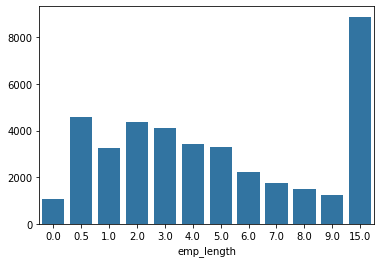

In [322]:
sns.barplot(x=df['emp_length'].value_counts().index, y=df['emp_length'].value_counts().values)


In [323]:
df1 = pd.pivot_table(df.groupby(['emp_length','loan_status']).count(),values='int_rate',index='emp_length',columns='loan_status',aggfunc='max')
df1

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
0.0,227,42,803
0.5,635,75,3861
1.0,453,71,2710
2.0,566,97,3720
3.0,555,83,3453
4.0,460,94,2875
5.0,457,88,2733
6.0,305,61,1860
7.0,263,62,1445


<Axes: xlabel='emp_length'>

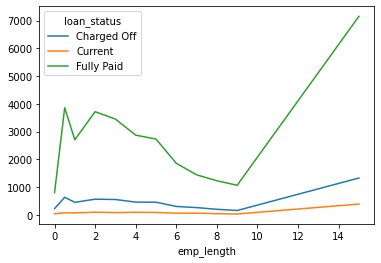

In [324]:
df1.plot()

<Axes: xlabel='emp_length'>

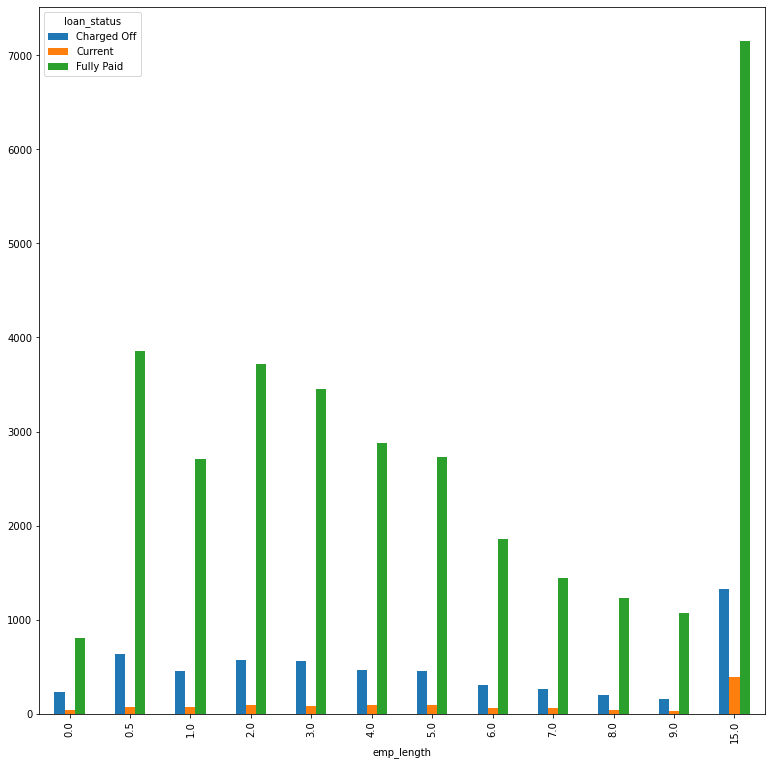

In [325]:
df1.plot(kind='bar',figsize=(13,13))

In [353]:
df1 = pd.pivot_table(df.groupby(['home_ownership','loan_status']).count(),values='int_rate',index='home_ownership',columns='loan_status',aggfunc='max')
df1


loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2323.0,638.0,14687.0
NONE,NaN,NaN,3.0
OTHER,18.0,NaN,78.0
OWN,441.0,83.0,2529.0
RENT,2829.0,419.0,15619.0


<Axes: xlabel='home_ownership'>

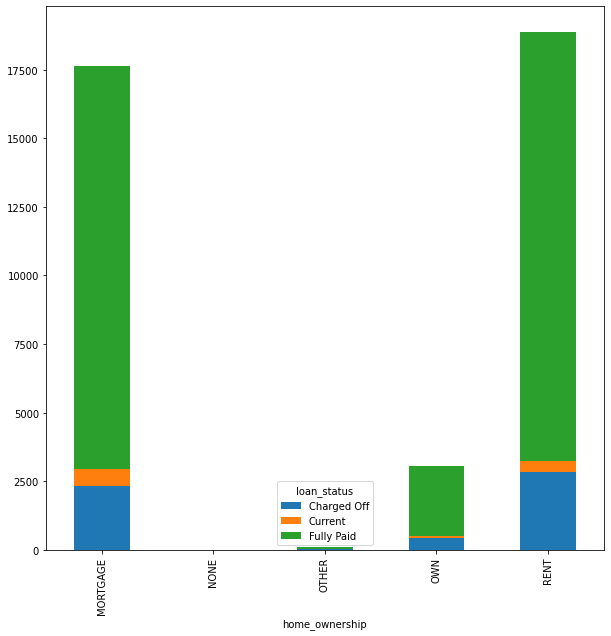

In [354]:
df1.plot(kind='bar',stacked=True,figsize=(10,10))

In [356]:
df1 = pd.pivot_table(df.groupby(['verification_status','loan_status']).count(),values='int_rate',index='verification_status',columns='loan_status',aggfunc='max')
df1



loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,2135,227,14530
Source Verified,1431,310,8235
Verified,2045,603,10151


<Axes: xlabel='verification_status'>

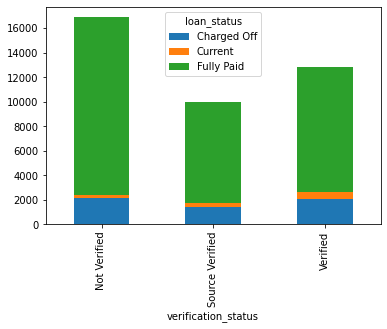

In [357]:
df1.plot(kind='bar',stacked=True)

In [362]:
df.addr_state.value_counts()

addr_state
CA    7092
NY    3811
FL    2865
TX    2723
NJ    1845
IL    1524
PA    1513
VA    1406
GA    1398
MA    1339
OH    1219
MD    1047
AZ     876
WA     839
CO     792
NC     787
CT     751
MI     720
MO     685
MN     613
NV     496
SC     472
WI     459
AL     451
OR     450
LA     436
KY     325
OK     299
KS     270
UT     258
AR     244
DC     212
RI     198
NM     189
WV     177
HI     173
NH     171
DE     113
MT      85
WY      83
AK      80
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='dti'>

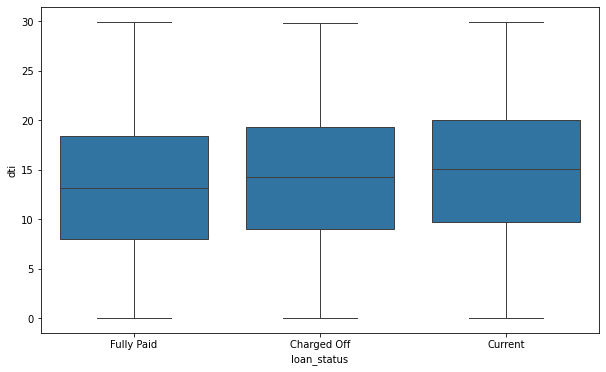

In [372]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df)

<Axes: xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

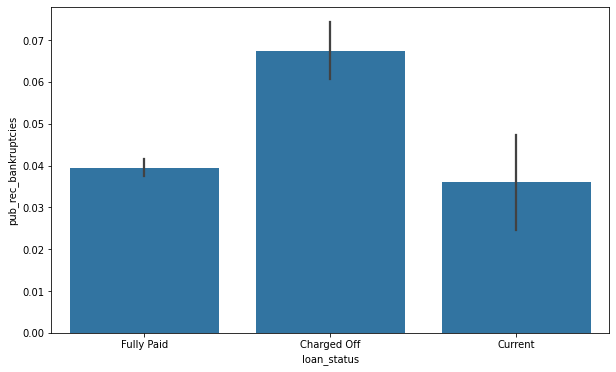

In [379]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='pub_rec_bankruptcies', data=df)

<Axes: xlabel='loan_status', ylabel='revol_util'>

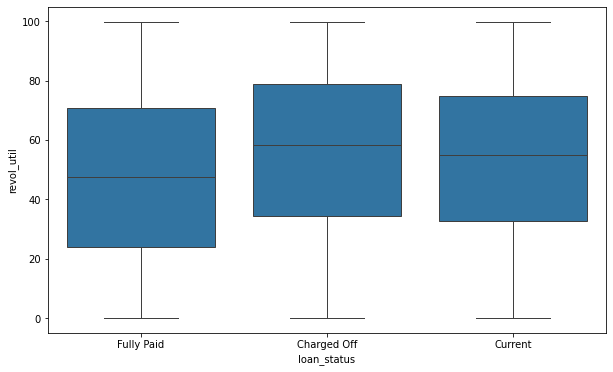

In [383]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=df)


<Axes: xlabel='loan_status', ylabel='pub_rec'>

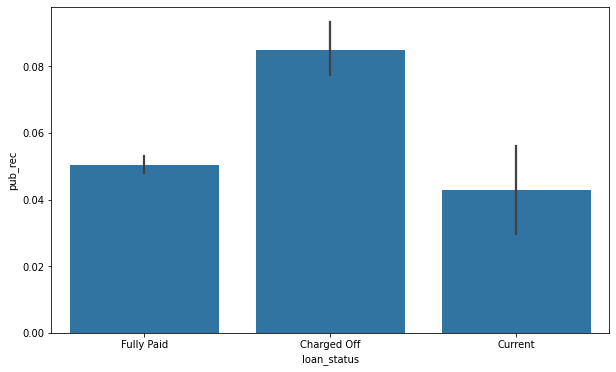

In [389]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='pub_rec', data=df)


<Axes: xlabel='loan_status', ylabel='open_acc'>

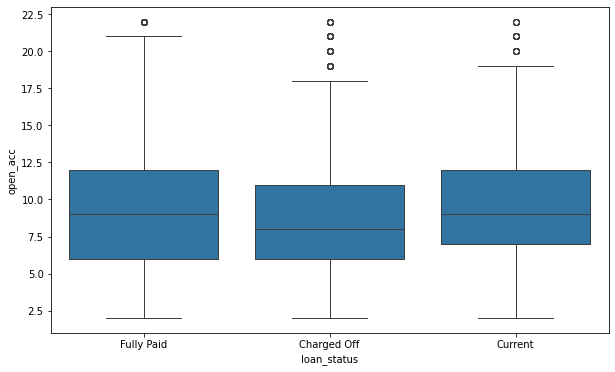

In [393]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y=df[df.open_acc <23]['open_acc'], data=df)